In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import boston_housing
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


# Data Loading and Preprocessing

In [2]:
# Boston Housing Dataset
# For details, see:
# https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
# 404 training observations with 13 features
x_train.shape

(404, 13)

In [4]:
# 102 test observations with 13 features
x_test.shape

(102, 13)

In [5]:
num_features = np.prod(x_train.shape[1:])
num_features

13

In [6]:
# The training and test targets are housing prices in Boston
(y_train[:5], y_test[:5])

(array([ 15.2,  42.3,  50. ,  21.1,  17.7]),
 array([  7.2,  18.8,  19. ,  27. ,  22.2]))

# Linear Regression

In [7]:
# All the logic to build a linear regression model
model = Sequential()
model.add(Dense(1, input_dim=num_features, activation='linear'))

## Two Ways to Summarize Model

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


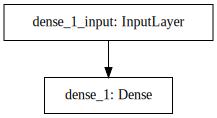

In [9]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Train Regression Model

In [10]:
# Trains the model, iterating on the training data in batches of 1 in 10 epochs.
model.compile(optimizer='rmsprop', loss='mse', metrics=["mae"])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Epoch 1/10
404/404 [==============================] - 0s - loss: 3625.0494 - mean_absolute_error: 46.2068     
Epoch 2/10
404/404 [==============================] - 0s - loss: 426.8992 - mean_absolute_error: 16.5710     
Epoch 3/10
404/404 [==============================] - 0s - loss: 191.6205 - mean_absolute_error: 10.5555     
Epoch 4/10
404/404 [==============================] - 0s - loss: 136.0928 - mean_absolute_error: 8.5685     
Epoch 5/10
404/404 [==============================] - 0s - loss: 108.5070 - mean_absolute_error: 7.7024     
Epoch 6/10
404/404 [==============================] - 0s - loss: 90.0912 - mean_absolute_error: 7.0194     
Epoch 7/10
404/404 [==============================] - 0s - loss: 78.5448 - mean_absolute_error: 6.5578     
Epoch 8/10
404/404 [==============================] - 0s - loss: 69.4827 - mean_absolute_error: 6.0779     
Epoch 9/10
404/404 [==============================] - 0s - loss: 66.3822 - mean_absolute_error: 5.8849     
Epoch 10/10
404/404

## Model Evaluation

In [11]:
# RMSE is about 8.5 and MAE is about 6.5.
mse, mae = model.evaluate(x_test, y_test, verbose=False)
rmse = np.sqrt(mse)

mse, rmse, mae

(64.384257148293884, 8.0239801313496457, 5.9020076639512009)

In [12]:
# Predict the first few houses in the test set
model.predict(x_test[:3, :])

array([[  7.62614107],
       [ 21.00255013],
       [ 23.90078163]], dtype=float32)

In [13]:
y_test[:3]

array([  7.2,  18.8,  19. ])